## Unit3 - Deeper into supervised learning

### Unit3_Lesson1_note

#### Unit3_Lesson1_Project1 - KNN classifier

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

##### K Nearest Neighbors Classifiers
Prior to now we have learned through **probability** (Naive Bayes) and **error** (regression). Here we will learn by similarity - looking for datapoints that are most similar to the observation being predicted.

###### Nearest Neighbor
Typically we use Euclidean distance to measure the **nearest** observation to the outcome we are predicting. With one observation in n-dimensions $(x_1, x_2, ...,x_n)$ and the other $(w_1, w_2,...,w_n)$:

$$ \sqrt{(x_1-w_1)^2 + (x_2-w_2)^2+...+(x_n-w_n)^2} $$

In [2]:
music = pd.DataFrame()

# Some data to play with.
music['duration'] = [184, 134, 243, 186, 122, 197, 294, 382, 102, 264, 
                     205, 110, 307, 110, 397, 153, 190, 192, 210, 403,
                     164, 198, 204, 253, 234, 190, 182, 401, 376, 102]
music['loudness'] = [18, 34, 43, 36, 22, 9, 29, 22, 10, 24, 
                     20, 10, 17, 51, 7, 13, 19, 12, 21, 22,
                     16, 18, 4, 23, 34, 19, 14, 11, 37, 42]

# We know whether the songs in our training data are jazz or not.
music['jazz'] = [ 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
                  0, 1, 1, 0, 1, 1, 0, 1, 1, 1,
                  1, 1, 1, 1, 0, 0, 1, 1, 0, 0]

from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a song with 24 loudness that's 190 seconds long.
neighbors.predict([[24, 190]])

array([0], dtype=int64)

Our model as pridicted amusic with loudness $24$ and duration $190$ as not a $jazz$

### K-Nearest Neighbor

**K-Nearest Neighbor(KNN)** is the logical extension of **Nearest Neighbor**, rather than looking for the single nearest datapoint to predict a outcome, we look at several of the nearest neighbors with $k$ beibg th number of neighbors we choose to look at. Each of the $k$ neighbors gets to decide on what the predicted outcome should be. With this, the prediction is smoothen out, it avoids explicit overfiting to the training data which is always the case for nearest neighbor. Alos with nearest neighbor, any single outlier can create pockets of one category prediction surrounded by a sea of the other category. Also, instead of just predicting classes we get implicit probability, each neighbor has a vote. Probability of the prediction coming from one class is: $ \frac{votes_i}{k} $. To come up with a classifier prediction it simply takes the class for which that fraction is maximized.

As an example, let's expand our previous nearest neighbors model toa KNN with a K of 5:

In [3]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = music[['loudness', 'duration']]
Y = music.jazz
neighbors.fit(X,Y)

## Predict for a 24 loudness, 190 seconds long song.
print(neighbors.predict([[24, 190]]))
print(neighbors.predict_proba([[24, 190]]))

[1]
[[0.4 0.6]]


Here there 2 votes for rock and 3 for jazz, we will thereby settle for jazz. Meanwhile the closest observation was rock.

We can visualize our decision bounds with something called a **MESH**.

In [4]:
# first we convert our data from df to array for mesh
X = np.array(X)
Y = np.array(Y)

# next we create a mesh size, this is something like grid size, a small value means more continuity, but more computing
h = 4.0

#we will then create the decision boundary and create a coordinate matrix. 

Why coordinate matrix? The reason you need coordinate matrices with Python/NumPy is that there is no direct relation from coordinates to values, except when your coordinates start with zero and are purely positive integers. Then you can just use the indices of an array as index. However when that's not the case you somehow need to store coordinates alongside your data. That's where grids come in. https://stackoverflow.com/questions/36013063/what-is-the-purpose-of-meshgrid-in-python-numpy 

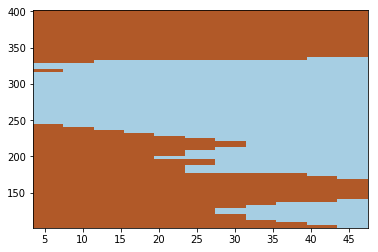

In [5]:
#in our mesh grid, we will be creating a cartesian coordinate with the X.loudness as x-axis and X.duration as y-axis
#our predictions must fall within this cartesian plan. We'll add 0.5 exra space so that no prediction fall on the border
#making it hard to identify. Our already defined h will be span of this plane
x_min = X[:, 0].min() - .5
x_max = X[:, 0].max() + .5
y_min = X[:, 1].min() - .5
y_max = X[:, 1].max() + .5

#create the coordinates for the cartesian plane
xx, yy = np.meshgrid(
    np.arange(x_min, x_max, h),
    np.arange(y_min, y_max, h)
)

#create prediction for each coordinate base on the initially decleared outcome variable: music.jazz
#xx.ravel()/yy.ravel() reshapes the xcoordinates into an ordinal matrices, i.e colapsing the inner arrays
#np.c_ creates a list of coordinates using each values of the ordinal arrays
#neighbors.predict then create the prediction for each coordinate based on music.jazz
Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot.
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

This plot shows all the possible prediction based on the values in X.music and X.loud. Any prediction we make will fall
within this plane.

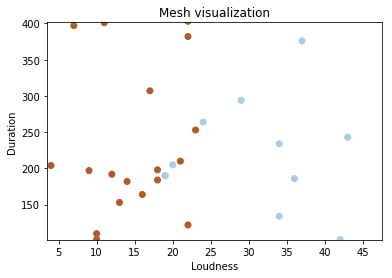

In [6]:
# Let's plot our training data on our cartesian
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

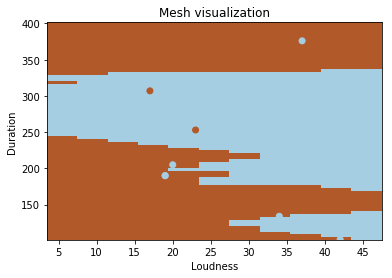

In [7]:
#combining this these two plots shows us our training prediction on the on our general prdeiction plot

Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(6, 4))
plt.set_cmap(plt.cm.Paired)
plt.pcolormesh(xx, yy, Z)

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.xlabel('Loudness')
plt.ylabel('Duration')
plt.title('Mesh visualization')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())

plt.show()

### Let's play arround with different values of h, i.e the spacing of our coordinate,
In the cell below, recreate the plot above with a mesh size of 10.0. Then reduce the mesh size until you get a plot that looks good but still renders in a reasonable amount of time. When do you get a visualization that looks acceptably continuous? When do you start to get a noticeable delay?

MemoryError: 

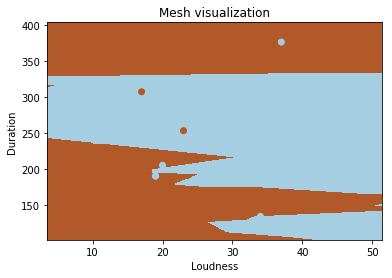

In [8]:
# Play with different mesh sizes here.
i=10
while i > 0:
    X = np.array(X)
    Y = np.array(Y)
    # next we create a mesh size, this is something like grid size, a small value means more continuity, but more computing
    h = i
    
    x_min = X[:, 0].min() - .5
    x_max = X[:, 0].max() + .5
    y_min = X[:, 1].min() - .5
    y_max = X[:, 1].max() + .5

    #create the coordinates for the cartesian plane
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, h),
        np.arange(y_min, y_max, h)
    )
    Z = neighbors.predict(np.c_[xx.ravel(), yy.ravel()])
    
    # Put the result into a color plot.
    Z = Z.reshape(xx.shape)
    plt.figure(1, figsize=(6, 4))
    plt.set_cmap(plt.cm.Paired)
    plt.pcolormesh(xx, yy, Z)
    
    # Add the training points to the plot.
    plt.scatter(X[:, 0], X[:, 1], c=Y)
    plt.xlabel('Loudness')
    plt.ylabel('Duration')
    plt.title('Mesh visualization')

    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    
    i=i-0.1
    
plt.show()

**As can be seen above, the mesh smoothen out at the step of 0.1. But this came along with memory error.**

## Challenge: Implement the Nearest Neighbor algorithm 

The Nearest Neighbor algorithm is extremely simple. So simple, in fact, that you should be able to build it yourself from scratch using the Python you already know. Code a Nearest Neighbors algorithm that works for two dimensional data. You can use either arrays or dataframes to do this. Test it against the SKLearn package on the music dataset from above to ensure that it's correct. The goal here is to confirm your understanding of the model and continue to practice your Python skills. We're just expecting a brute force method here. After doing this, look up "ball tree" methods to see a more performant algorithm design.

In [18]:
import math
def knn_self_made(variables, outcome, input_data, k):
    distance = []
    for i in range(len(variables)):
        distance.append(math.sqrt((variables[i][0]-input_data[0])**2 + (variables[i][1]-input_data[1])**2 ))
        
    #get the indices of the kth least elements in the distance array   
    indices_min_dist = np.argsort(distance)[:k]
    
    #use the indices to generation the outome votes from the outcome array
    votes = outcome[indices_min_dist]
    
    #count the outcome votes. this also return the votes itself along with the count
    candidate, votes  = np.unique(votes, return_counts=True)         
    print('{} scored {}, {} scored {}'.format(candidate[0], votes[0], candidate[1], votes[1]))
          
knn_self_made(X, Y, [24, 190], 3)

0 scored 2, 1 scored 1
